In [156]:
import random
import numpy as np
import pandas as pd
import math
from random import randint
from __future__ import division
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

cancer_df = pd.read_table("wdbc.data.txt", sep=',', header=None)

labels = cancer_df.iloc[:,1].values
cols = [x for x in cancer_df.columns]
cancer_df.drop([0, 1], axis = 1, inplace = True)
labels = (labels == 'M').astype(int) #1 for malignant, 0 for benign
labels = labels*2
labels = labels-1 #1 for malignant, -1 for benign
X = cancer_df.as_matrix()
print(labels[:50])
print(labels.shape)
print(X.shape)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1
 -1 -1]
(569,)
(569, 30)


/Users/kaihanshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [157]:
"""
569 examples. Separate this dataset randomly into 100 validation, 100
test, and 369 training examples
"""
def generate_data_sets(X, labels):
    N, M = X.shape
    indices = [i for i in range(N)]
    random.shuffle(indices)
    X_train = X[indices[:369]]
    X_val = X[indices[369:469]]
    X_test = X[indices[469:]]
    y_train = labels[indices[:369]]
    y_val = labels[indices[369:469]]
    y_test = labels[indices[469:]]
    
    #normalize data
    data_mean = X_train.mean(axis=0)
    data_std = X_train.std(axis=0)
    X_train -= data_mean
    X_train /= data_std
    X_val -= data_mean
    X_val /= data_std
    X_test -= data_mean
    X_test /= data_std
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [158]:
X_train, X_val, X_test, y_train, y_val, y_test = generate_data_sets(X, labels)

In [172]:
num_epochs = 50
steps_per_epoch = 100
reg_values = [1e-3, 1e-2, 1e-1, 1]
reg_accuracies = []
val_a = []
val_b = []

def get_sample(X_set, y_set):
    N, D = X_set.shape
    choice = randint(0, N-1)
    return X_set[choice, :], y_set[choice]

def compute_accuracy(a,b,x_test,y_test):
    right = 0
    wrong = 0
    for i in range(len(x_test)):
        if(np.sign(a.T@x_test[i]+b)==y_test[i]):
            right += 1
        else:
            wrong += 1
    return(right/(right+wrong))

def get_eval(leng):
    x = list(range(0,leng))
    evaluation = random.sample(x,50)
    return evaluation   

for i in range(len(reg_values)):
    train_accuracy = []
    a = np.zeros(len(X_train[0]))
    b = 0
    for epoch in range(num_epochs):
        evalset = get_eval(len(X_train))
        for step in range(steps_per_epoch):
            X_k,y_k = get_sample(X_train,y_train)
            hinge_term = max(0,y_k*(a.T@X_k+b))
            if step%10==0:
                train_accuracy.append(compute_accuracy(a, b, X_train[evalset], y_train[evalset]))
            a -= (1/(epoch+18))*reg_values[i]*a
            if(hinge_term < 1):
                a += (1/(epoch+18))*(y_k*X_k)
                b += (1/(epoch+18))*y_k
    val_a.append(a)
    val_b.append(b)
    reg_accuracies.append(train_accuracy)

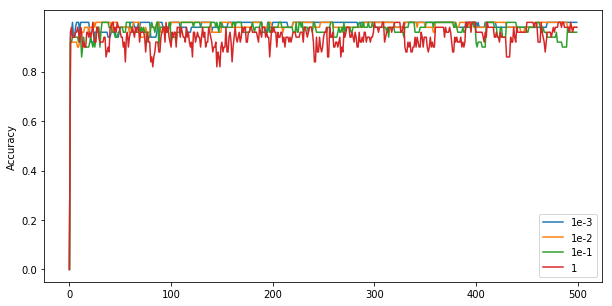

In [173]:
plt.figure(figsize=(10,5))
plt.plot(reg_accuracies[0],label='1e-3')
plt.plot(reg_accuracies[1],label='1e-2')
plt.plot(reg_accuracies[2],label='1e-1')
plt.plot(reg_accuracies[3],label='1')
my_y_ticks = np.arange(0, 1, 0.2)
plt.yticks(my_y_ticks)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [174]:
losses = []
j=0
while j < len(val_a):
    a = val_a[j]
    b = val_b[j]
    lamb = reg_values[j]
    temp = 0.0
    i=0
    while i < len(y_val):
        X_i = X_val[i]
        y_i = y_val[i]
        temp += max(0,1-y_i*(a.T@X_i+b))
        i += 1
    loss = 0.0
    loss = temp/len(y_val)+lamb*((a.T@a)/2)
    losses.append(loss)
    j += 1
print(losses)

[0.10068293279371197, 0.12084085839702324, 0.19192493183142018, 0.30469863271670655]


In [162]:
Predict = []
i=0
while i < len(val_b):
    a = val_a[i]
    b = val_b[i]
    lamb = reg_values[i]
    predict = []
    j = 0
    while j < len(y_test):
        X_j = X_test[j]
        temp = a.T@X_j+b
        if temp < 0:
            predict.append(-1)
        else:
            predict.append(1)
        j +=1
    Predict.append(predict)
    i += 1

In [163]:
print(metrics.classification_report(Predict[0], y_test))
print(metrics.classification_report(Predict[1], y_test))
print(metrics.classification_report(Predict[2], y_test))
print(metrics.classification_report(Predict[3], y_test))

             precision    recall  f1-score   support

         -1       1.00      0.95      0.97        61
          1       0.93      1.00      0.96        39

avg / total       0.97      0.97      0.97       100

             precision    recall  f1-score   support

         -1       1.00      0.97      0.98        60
          1       0.95      1.00      0.98        40

avg / total       0.98      0.98      0.98       100

             precision    recall  f1-score   support

         -1       1.00      0.95      0.97        61
          1       0.93      1.00      0.96        39

avg / total       0.97      0.97      0.97       100

             precision    recall  f1-score   support

         -1       1.00      0.92      0.96        63
          1       0.88      1.00      0.94        37

avg / total       0.96      0.95      0.95       100

